# 2022-02-07 Linear Algebra


## Last time

* Forward and backward stability
* Beyond IEEE double precision
* Discuss [portfolios](https://classroom.github.com/a/strHwkaV)

## Today

* Algebra of linear transformations
* Polynomial evaluation and fitting
* Orthogonality

In [7]:
using Plots
default(linewidth=4, legendfontsize=12)

# Matrices as linear transformations

Linear algebra is the study of linear transformations on vectors, which represent points in a finite dimensional space.  The matrix-vector product $y = A x$ is a linear combination of the columns of $A$.  The familiar definition,

$$ y_i = \sum_j A_{i,j} x_j $$

can also be viewed as

$$ y = \Bigg[ A_{:,1} \Bigg| A_{:,2} \Bigg| \dotsm \Bigg] \begin{bmatrix} x_1 \\ x_2 \\ \vdots \end{bmatrix}
= \Bigg[ A_{:,1} \Bigg] x_1 + \Bigg[ A_{:,2} \Bigg] x_2 + \dotsb . $$

# Math and Julia Notation

The notation $A_{i,j}$ corresponds to the Julia syntax `A[i,j]` and the colon `:` means the entire range (row or column).  So $A_{:,j}$ is the $j$th column and $A_{i,:}$ is the $i$th row.  The corresponding Julia syntax is `A[:,j]` and `A[i,:]`.

Julia has syntax for row vectors, column vectors, and arrays.

In [44]:
[1. 2 3]

1×3 Matrix{Float64}:
 1.0  2.0  3.0

In [9]:
[1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [10]:
[1 0; 0 2; 10 3]

3×2 Matrix{Int64}:
  1  0
  0  2
 10  3

In [46]:
[1; 2; 3]' # transpose

1×3 adjoint(::Vector{Int64}) with eltype Int64:
 1  2  3

# Implementing multiplication by row

In [51]:
function matmult1(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        for j in 1:n
            y[i] += A[i,j] * x[j]
        end
    end
    y
end

A = reshape(1.:12, 3, 4) # 3x4 matrix
#x = [10., 0, 0, 0]
#matmult1(A, x)

3×4 reshape(::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, 3, 4) with eltype Float64:
 1.0  4.0  7.0  10.0
 2.0  5.0  8.0  11.0
 3.0  6.0  9.0  12.0

In [57]:
# Dot product
A[2,:]' * x

20.0

In [58]:
function matmult2(A, x)
    m, n = size(A)
    y = zeros(m)
    for i in 1:m
        y[i] = A[i,:]' * x
    end
    y
end

matmult2(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

# Implementing multiplication by column


In [15]:
function matmult3(A, x)
    m, n = size(A)
    y = zeros(m)
    for j in 1:n
        y += A[:, j] * x[j]
    end
    y
end

matmult3(A, x)

3-element Vector{Float64}:
 10.0
 20.0
 30.0

In [16]:
A * x # We'll use this version 

3-element Vector{Float64}:
 10.0
 20.0
 30.0

# Polynomial evaluation is (continuous) linear algebra
We can evaluate polynomials using matrix-vector multiplication.
For example,
$$ 5x^3 - 3x = \Bigg[ 1 \Bigg|\, x \Bigg|\, x^2 \,\Bigg|\, x^3 \Bigg] \begin{bmatrix}0 \\ -3 \\ 0 \\ 5 \end{bmatrix} . $$

In [59]:
using Polynomials
P(x) = Polynomial(x)

p = [0, -3, 0, 5]
q = [1, 2, 3, 4]
f = P(p) + P(q)
@show f
@show P(p+q)
x = [0., 1, 2]
f.(x)

f = Polynomial(1 - x + 3*x^2 + 9*x^3)
P(p + q) = Polynomial(1 - x + 3*x^2 + 9*x^3)


3-element Vector{Float64}:
  1.0
 12.0
 83.0

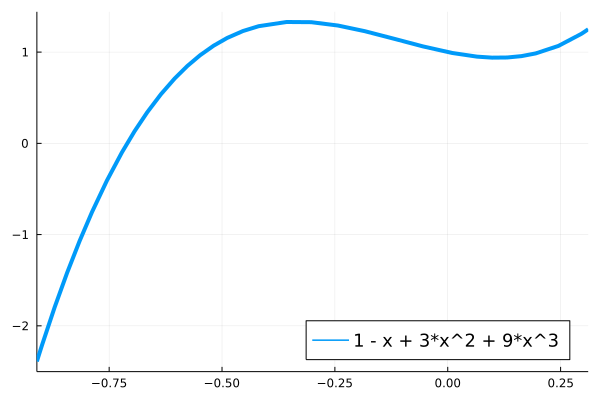

In [65]:
plot(f, legend=:bottomright)

# Polynomial evaluation is (discrete) linear algebra

In [66]:
V = [one.(x) x x.^2 x.^3]

3×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  1.0  1.0  1.0
 1.0  2.0  4.0  8.0

In [20]:
V * p + V * q

3-element Vector{Float64}:
  1.0
 12.0
 83.0

In [21]:
V * (p + q)

3-element Vector{Float64}:
  1.0
 12.0
 83.0

# Vandermonde matrices

A Vandermonde matrix is one whose columns are functions evaluated at discrete points.

$$V(x) = \begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}$$

In [67]:
function vander(x, k=nothing)
    if isnothing(k)
        k = length(x)
    end
    m = length(x)
    V = ones(m, k)
    for j in 2:k
        V[:, j] = V[:, j-1] .* x
    end
    V
end

vander (generic function with 2 methods)

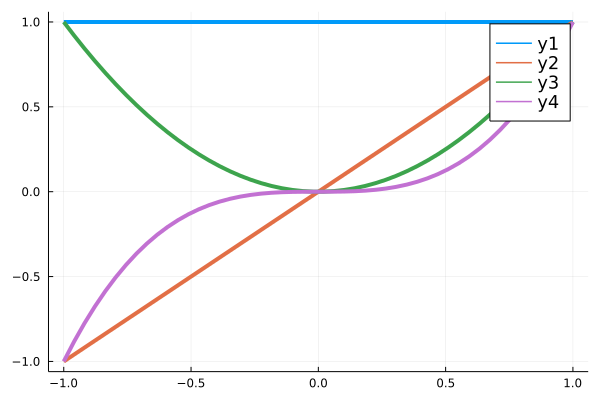

In [68]:
x = LinRange(-1, 1, 50)
V = vander(x, 4)
plot(x, V)

# Fitting is linear algebra

$$ \underbrace{\begin{bmatrix} 1 \Bigg| x \Bigg| x^2 \Bigg| x^3 \Bigg| \dotsb \end{bmatrix}}_{V(x)} \Big[ p \Big] = \Bigg[ y \Bigg]$$

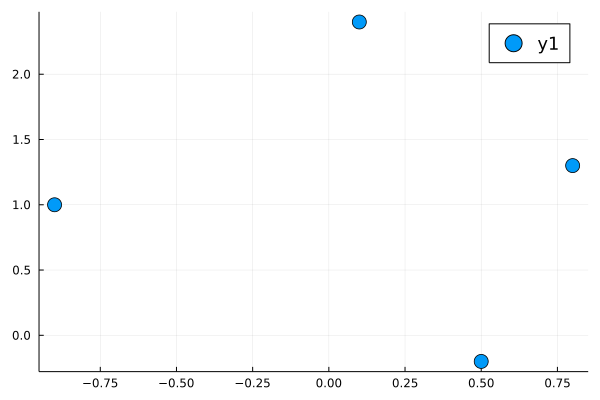

In [69]:
x1 = [-.9, 0.1, .5, .8]
y1 = [1, 2.4, -.2, 1.3]
scatter(x1, y1, markersize=8)

size(V) = (4, 4)


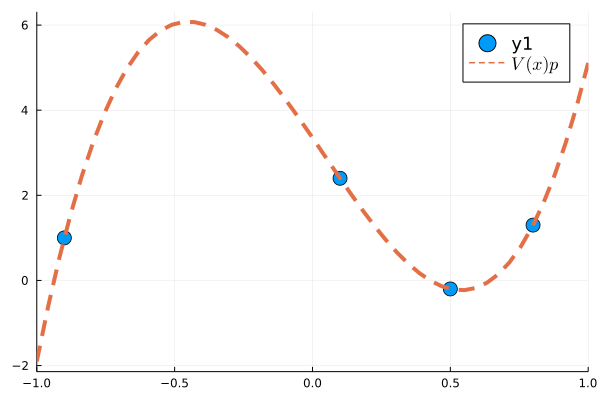

In [82]:
V = vander(x1, 4)
@show size(V)
p = V \ y1 # write y1 in the polynomial basis
scatter(x1, y1, markersize=8, xlims=(-1, 1))
#plot!(P(p), label="P(p)")
plot!(x, vander(x, 4) * p, label="\$ V(x) p\$", linestyle=:dash)

# Some common terminology

* The **range** of $A$ is the space spanned by its columns.  This definition coincides with the range of a function $f(x)$ when $f(x) = A x$.
* The (right) **nullspace** of $A$ is the space of vectors $x$ such that $A x = 0$.
* The **rank** of $A$ is the dimension of its range.
* A matrix has **full rank** if the nullspace of either $A$ or $A^T$ is empty (only the 0 vector).  Equivalently, if all the columns of $A$ (or $A^T$) are linearly independent.
* A **nonsingular** (or **invertible**) matrix is a square matrix of full rank.  We call the inverse $A^{-1}$ and it satisfies $A^{-1} A = A A^{-1} = I$.

$\DeclareMathOperator{\rank}{rank} \DeclareMathOperator{\null}{null} $
If $A \in \mathbb{R}^{m\times m}$, which of these doesn't belong?
1. $A$ has an inverse $A^{-1}$
2. $\rank (A) = m$
3. $\null(A) = \{0\}$
4. $A A^T = A^T A$
5. $\det(A) \ne 0$
6. $A x = 0$ implies that $x = 0$

In [86]:
A = rand(4,4)
#A' * A - A * A'
det(A)

-0.08969850225286818

# What is an inverse?

When we write $x = A^{-1} y$, we mean that $x$ is the unique vector such that $A x = y$.
(It is rare that we explicitly compute a matrix $A^{-1}$, though [it's not as "bad"](https://arxiv.org/abs/1201.6035) as people may have told you.)
A vector $y$ is equivalent to $\sum_i e_i y_i$ where $e_i$ are columns of the identity.
Meanwhile, $x = A^{-1} y$ means that we are expressing that same vector $y$ in the basis of the columns of $A$, i.e., $\sum_i A_{:,i} x_i$.


In [27]:
using LinearAlgebra
A = rand(4, 4)

4×4 Matrix{Float64}:
 0.529731  0.00344266  0.0249711  0.446597
 0.65379   0.874346    0.629848   0.296424
 0.308001  0.687619    0.654854   0.627373
 0.252958  0.033781    0.86887    0.405012

In [28]:
A \ A

4×4 Matrix{Float64}:
  1.0  1.69813e-16  6.45103e-17  -1.4185e-18
 -0.0  1.0          7.87401e-17  -2.28895e-17
  0.0  0.0          1.0           3.32473e-17
  0.0  0.0          5.25774e-17   1.0

In [29]:
inv(A) * A

4×4 Matrix{Float64}:
 1.0          2.80573e-16  4.18345e-17   1.09056e-17
 6.36277e-17  1.0          9.18807e-17  -1.04138e-16
 1.07459e-16  6.39634e-17  1.0           4.11885e-17
 4.48719e-17  7.42799e-17  7.86144e-17   1.0

# Inner products and orthogonality

The **inner product**
$$ x^T y = \sum_i x_i y_i $$
of vectors (or columns of a matrix) tell us about their magnitude and about the angle.
The **norm** is induced by the inner product,
$$ \lVert x \rVert = \sqrt{x^T x} $$
and the angle $\theta$ is defined by
$$ \cos \theta = \frac{x^T y}{\lVert x \rVert \, \lVert y \rVert} . $$
Inner products are **bilinear**, which means that they satisfy some convenient algebraic properties
$$ \begin{split}
(x + y)^T z &= x^T z + y^T z \\
x^T (y + z) &= x^T y + x^T z \\
(\alpha x)^T (\beta y) &= \alpha \beta x^T y \\
\end{split} . $$

# Examples with inner products

In [90]:
x = [0, 1]
y = [1, 1]
@show x' * y
@show y' * x;

x' * y = 1
y' * x = 1


In [35]:
ϕ = pi/6
y = [cos(ϕ), sin(ϕ)]
cos_θ = x'*y / (norm(x) * norm(y))
@show cos_θ
@show cos(ϕ-pi/2);

cos_θ = 0.49999999999999994
cos(ϕ - pi / 2) = 0.4999999999999999


# Polynomials can be orthogonal too!


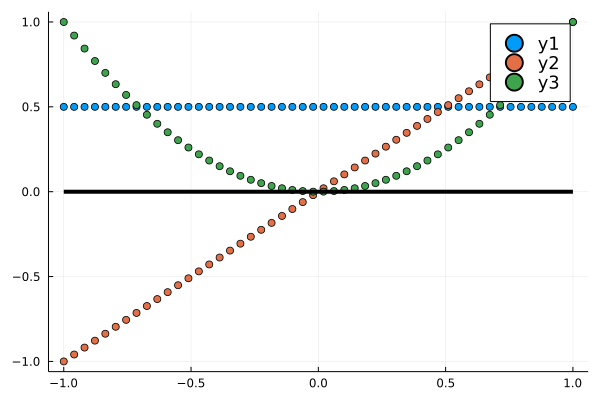

In [39]:
x = LinRange(-1, 1, 50)
A = vander(x, 4)
M = A * [.5 0 0 0; # 0.5
         0  1 0 0;  # x
         0  0 1 0]' # x^2
scatter(x, M)
plot!(x, 0*x, label=:none, color=:black)

* Which inner product will be zero?

  * Which functions are even and odd?

# Polynomial inner products

In [40]:
M[:,1]' * M[:,2]

-2.220446049250313e-16

In [42]:
M[:,1]' * M[:,3]

8.673469387755102

In [41]:
M[:,2]' * M[:,3]

-4.440892098500626e-16